## Classification of positions from attention patterns

### Imports

In [19]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from flaml import AutoML
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [20]:
# Directory containing the JSON files
data_file = "/net/mimer/mnt/tank/projects2/kvs_students/2025/jbo_unbiased_seq_annot/master_thesis/data/100_small/preprocessed/pos_class.feather"

df = pd.read_feather(data_file)
df

,class,position,layer1,layer2,layer3,layer4,layer5,layer6,layer7,layer8,...,layer24,layer25,layer26,layer27,layer28,layer29,layer30,layer31,layer32,layer33
0,13.0,25.0,-0.094724,0.602980,0.060122,0.310692,0.299054,0.086255,-0.069752,-0.677029,...,-0.120157,0.078318,0.054973,-0.062524,-0.111525,0.195960,0.089295,-0.154030,-0.667249,-0.352356
1,13.0,26.0,-0.070892,0.612430,0.083121,0.352810,0.312256,0.160908,-0.058609,-0.564270,...,-0.045309,0.065296,-0.036892,-0.236323,-0.129012,0.222137,0.014830,-0.172167,-0.596062,-0.395169
2,13.0,27.0,-0.065529,0.617335,0.093619,0.261248,0.330559,0.161797,0.009054,-0.682309,...,-0.031198,0.124909,0.019303,-0.190212,-0.148106,0.283203,0.064646,-0.156993,-0.662804,-0.356221
3,13.0,28.0,-0.063881,0.620740,0.078810,0.247438,0.327166,0.189166,-0.027272,-0.700684,...,0.014729,0.124350,-0.038560,-0.199355,-0.139918,0.289641,0.033439,-0.196113,-0.719219,-0.323320
4,13.0,29.0,-0.046452,0.580314,0.072868,0.305597,0.431709,0.162980,-0.078083,-0.699393,...,-0.062988,0.125087,0.001136,-0.243265,-0.146362,0.275281,0.019759,-0.175823,-0.705853,-0.352442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43207,0.0,222.0,0.159046,1.804437,1.201530,1.144054,1.007779,0.706919,0.361606,-0.024669,...,2.206447,2.014766,1.936344,2.142393,1.926864,1.667126,1.698959,1.589589,0.767965,1.239307
43208,0.0,223.0,0.220854,1.833890,1.220334,1.040438,1.035203,0.854673,0.128845,-0.160609,...,2.210159,2.010580,2.022165,2.150678,1.788854,1.676956,1.737257,1.556089,0.817987,1.050931
43209,0.0,224.0,0.170915,1.846879,1.088464,1.144500,1.077209,0.640421,0.395487,0.063505,...,2.114741,1.805911,1.848598,2.038872,1.635764,1.650789,1.680147,1.489248,0.830942,1.100719
43210,0.0,225.0,0.080758,1.800981,0.989016,1.086505,1.010437,0.609376,0.437011,-0.022940,...,2.019093,1.759001,1.747927,2.012351,1.585708,1.456362,1.608509,1.193315,0.602401,1.192100


In [25]:
y = df.iloc[:, 0]         
X = df.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
settings = {
    "time_budget": 60, 
    "metric": 'accuracy', 
    "task": 'classification',  
    "log_file_name": 'autoML_classification.log',
    "estimator_list": ['lgbm', 'rf', 'extra_tree', 'lrl1', 'xgboost'],
}

automl = AutoML()
automl.fit(X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test, **settings)

[flaml.automl.logger: 04-11 09:05:17] {1728} INFO - task = classification
[flaml.automl.logger: 04-11 09:05:17] {1736} INFO - Data split method: stratified
[flaml.automl.logger: 04-11 09:05:17] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-11 09:05:17] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-11 09:05:17] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'extra_tree', 'lrl1', 'xgboost']
[flaml.automl.logger: 04-11 09:05:17] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-11 09:05:18] {2393} INFO - Estimated sufficient time budget=1902s. Estimated necessary time budget=32s.
[flaml.automl.logger: 04-11 09:05:18] {2442} INFO -  at 0.7s,	estimator lgbm's best error=0.5609,	best estimator lgbm's best error=0.5609
[flaml.automl.logger: 04-11 09:05:18] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-11 09:05:18] {2442} INFO -  at 0.9s,	estimator lgbm's best error=0.5609,	best 

Best model: <flaml.automl.model.LGBMEstimator object at 0x7f99c6315db0>
Accuracy: 0.8714566701376837


<Figure size 1500x1500 with 0 Axes>

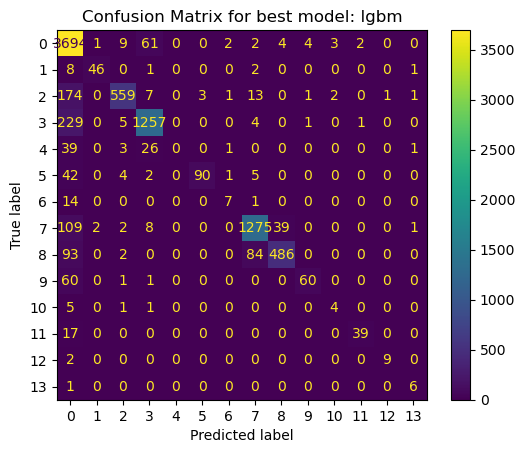

In [27]:
y_pred = automl.predict(X_test)
print("Best model:", automl.model)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10), dpi=150)
ConfusionMatrixDisplay(cm).plot()
#cm_plot.plot()
plt.title(f'Confusion Matrix for best model: {automl.best_estimator}')
plt.show()

<BarContainer object of 34 artists>

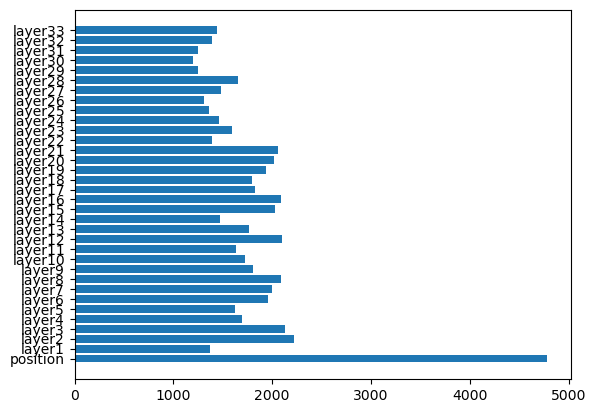

In [28]:
plt.barh(automl.model.estimator.feature_name_, automl.model.estimator.feature_importances_)